

## Ham or Spam

    in this notebook we are building a spam classifier.
    We will use the probability theory called Baye’s Theorem. It is mathematically expressed as:



<img src="img/spam.png">

    We have a message m = (w1, w2, . . . . , wn), where (w1, w2, . . . . , wn) is a set of unique words contained in the message. We need to find:

<img src="img/spam2.png">

    If we assume that occurrence of a word are independent of all other words, we can simplify the above expression to

<img src="img/spam3.png">

    In order to classify we have to determine which is greater


<img src="img/spam4.png">

    ....................................................................................................

# Data


    The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. 
    It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
    Source: https://www.kaggle.com/uciml/sms-spam-collection-dataset/


In [71]:
# Import libraries

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [66]:
# read the data file
mails = pd.read_csv('sms-spam-collection-dataset.csv', encoding = 'latin-1')

In [67]:
mails.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Cleaning and Reformating the Dataset

In [68]:
mails.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [69]:
mails.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
mails.rename(columns = {'v1': 'labels', 'v2': 'message'}, inplace = True)
mails.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# Count the labels
mails['labels'].value_counts()

ham     4825
spam     747
Name: labels, dtype: int64

In [19]:
# change the labels to numeric 
mails['label'] = mails['labels'].map({'ham': 0, 'spam': 1})
mails.head()

,labels,message,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [20]:
# remove labels column
mails.drop(['labels'], axis = 1, inplace = True)
mails.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


# Word Cloud Visualiztion

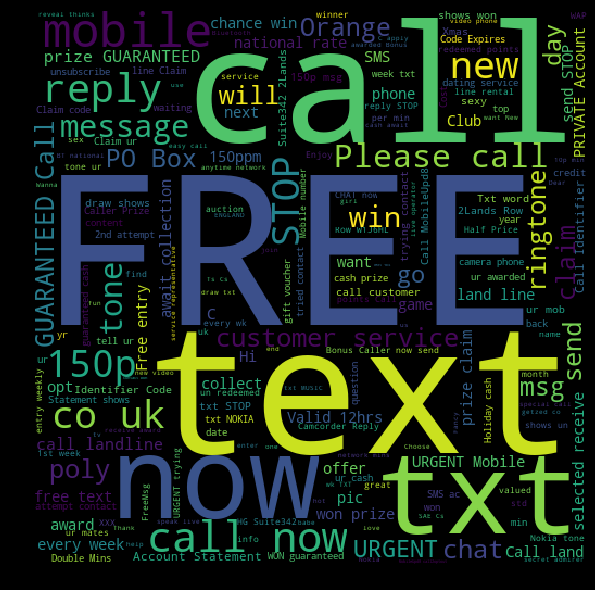

In [35]:

spam_words = ' '.join(list(mails[mails['label'] == 1]['message']))

spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

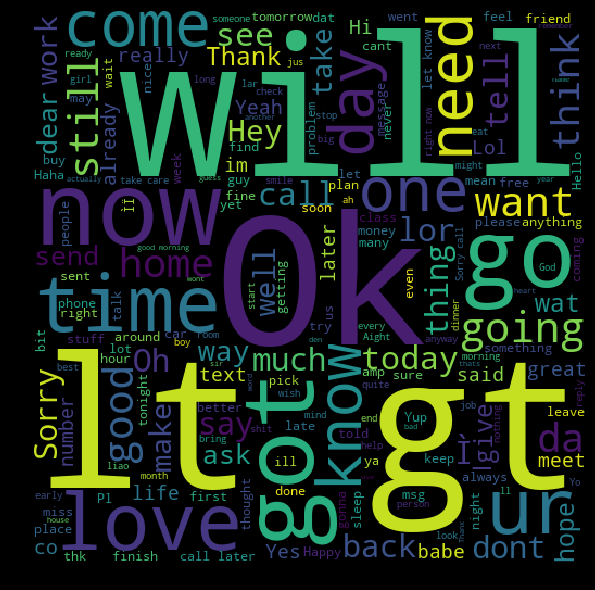

In [36]:

ham_words = ' '.join(list(mails[mails['label'] == 0]['message']))

ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)

plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

# Train-Test Split

 We shall use 75% of the dataset as train dataset and the rest as test dataset. Selection of this 75% of the data is uniformly random.

In [25]:

totalMails = 5572 #= total number of emails

trainIndex, testIndex = list(), list()

for i in range(mails.shape[0]):
    if np.random.uniform(0, 1) < 0.75: # we will use 75% of the dataset as train dataset and the rest as test dataset. 
                                        #Selection of this 75% of the data is uniformly random.
        trainIndex += [i]
    else:
        testIndex += [i]

#create the training and the testing dataset
trainData = mails.loc[trainIndex]
testData = mails.loc[testIndex]

In [26]:
#explore the training data

trainData.reset_index(inplace = True)
trainData.drop(['index'], axis = 1, inplace = True)
trainData.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,"Nah I don't think he goes to usf, he lives aro...",0
4,FreeMsg Hey there darling it's been 3 week's n...,1


In [29]:
trainData['label'].value_counts()

0    3688
1     570
Name: label, dtype: int64

In [27]:
#explore the testing data

testData.reset_index(inplace = True)
testData.drop(['index'], axis = 1, inplace = True)
testData.head()

,message,label
0,U dun say so early hor... U c already then say...,0
1,"SIX chances to win CASH! From 100 to 20,000 po...",1
2,Aft i finish my lunch then i go str down lor. ...,0
3,Ffffffffff. Alright no way I can meet up with ...,0
4,Just forced myself to eat a slice. I'm really ...,0


In [30]:
testData['label'].value_counts()

0    1137
1     177
Name: label, dtype: int64

# Training the model

In [74]:
from sklearn.naive_bayes import *
from sklearn.dummy import *
from sklearn.ensemble import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.calibration import *
from sklearn.linear_model import *
from sklearn.multiclass import *
from sklearn.svm import *
import pandas
import csv

In [80]:
data = pd.read_csv('sms-spam-collection-dataset.csv', encoding='latin-1')
train_data = data[:4400] # 4400 items
test_data = data[4400:] # 1172 items

classifier = OneVsRestClassifier(SVC(kernel='linear'))
vectorizer = TfidfVectorizer()

In [81]:
# train
vectorize_text = vectorizer.fit_transform(train_data.v2)
classifier.fit(vectorize_text, train_data.v1)

OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
          n_jobs=None)

In [83]:
# score
vectorize_text = vectorizer.transform(test_data.v2)
score = classifier.score(vectorize_text, test_data.v1)
print(score)

0.9880546075085325


In [84]:
# calcualte the predection 
csv_arr = []
for index, row in test_data.iterrows():
    answer = row[0]
    text = row[1]
    vectorize_text = vectorizer.transform([text])
    predict = classifier.predict(vectorize_text)[0]
    if predict == answer:
        result = 'right'
    else:
        result = 'wrong'
    csv_arr.append([len(csv_arr), text, answer, predict, result])

In [79]:
# write csv
with open('test_score.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=';',
            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['#', 'text', 'answer', 'predict', result])

    for row in csv_arr:
        spamwriter.writerow(row)